# 指标系统
----
 - M1、M2、CPI、PPI、PMI、GDP、BDI
 - 市场人气指标、巴菲特指数
 - M2与GDP、M2与上交所A股流通市值
 - 股票盈利收益率、A股市盈率、市净率、股息率
 - 融资融券、新增信贷、证券市场交易结算资金
 - A股股票新增开户数、股指期货主力合约
 - 利率、存款保证金率、Shibor隔夜拆借利率
 - 10年期国债收益率曲线
 - 美元指数、美元人民币&离岸

In [1]:

#导入库
import numpy as np
import pandas as pd

import sys
sys.path.append('/home/jquser')

from pf_mcr import Mcr

mcr=Mcr('csv','../Data/')

数据引擎：运行于研究
宏观框架：运行于研究


## 获取数据

In [2]:
mcr.data.update(mcr.pool.track)

数据更新：宏观，无需更新 借利率 


## 生成标的

In [2]:
_codes={
    'CPI':'居民消费价格指数',
    'PPI':'工业品出厂价格指数',
    'PMI':'采购经理人指数',
    'MS':'货币供应量',
    'NFC':'新增信贷数据',
    'GDP':'国内生产总值',
    'SCN':'股票账户新开',
    
    'SHIBOR':u'上海银行同行业拆借利率',
    
    'UDI':u'美元指数',
    'VIX':u'VIX波动率',
    'BDI':u'波罗的海干散货指数',
    'C10Y':u'中国十年期国债',
    'C5Y':u'中国五年期国债',
    'U10Y':u'美国十年期国债',
    'U5Y':u'美国五年期国债',
    'UCH':'离岸人民币',
    'UCY':'在岸人民币',
    }


# mcr.pool.create(_codes)
# mcr.pool.track

In [3]:
def get_contrast_data(code='000902.XSHG'):
    #获取收盘行情
    df=get_price(code,start_date='2005-01-01',end_date=pd.datetime.today(),fields=['close'])   
 
    #返回数据
    return df

def data_to_period(df,period='W'):
        df['date']=df.index
        df=df.resample(period,how='last')
        df.index=df['date']
        del df['date']
        df=df.dropna()
        df.index.name=None
        return df    

    
# GDP同比增长与指数对比图        
def get_gdp_chart(code):

    df=get_contrast_data()#.dropna()

    mcr_df=East.get_data(code)[['cost']]
    
    df[code]=mcr_df.resample('D',fill_method='ffill')

    #组织指数数据
    df=data_to_period(df,period='W')


    
    df.plot(figsize=(18,7),secondary_y=['close'],title='',
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r'])  
    
    
get_gdp_chart('SCN')    

NameError: global name 'East' is not defined

## 1.宏观经济

### 1.1.国内生产总值-GDP
---

GDP是按市场价格计算的国内生产总值的简称，是指一个国家（或地区）所有常住单位在一定时期内生产活动的最终成果。它涉及的是经济活动，是实实在在的。
判断宏观经济运行状况主要有3个重要经济指标，经济增长率、通货膨胀率，失业率，这三个指标都与GDP有密切关系，其中经济增长率就是GDP增长率，通货膨胀率就是GDP紧缩指数，失业率中的奥肯定律表明当GDP增长大于2.25个百分点时，每增加一个百分单位的国内生产总值，失业率就降低0.5个百分点。

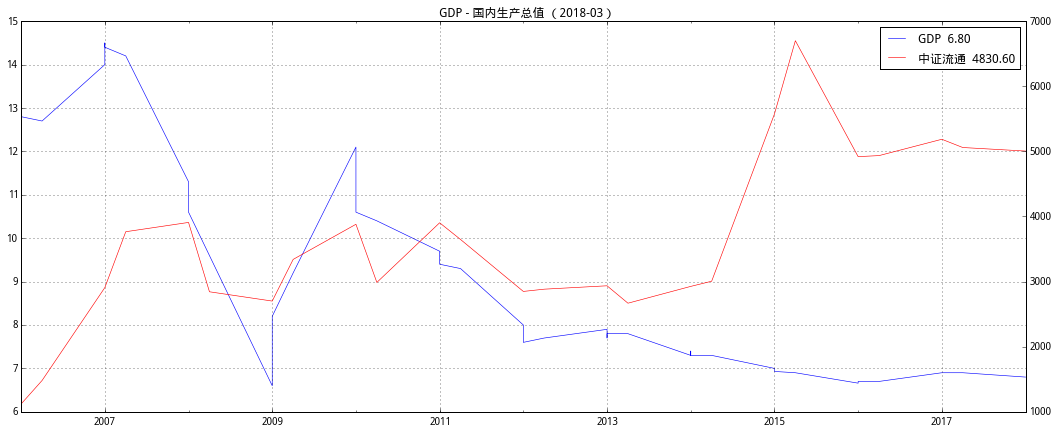

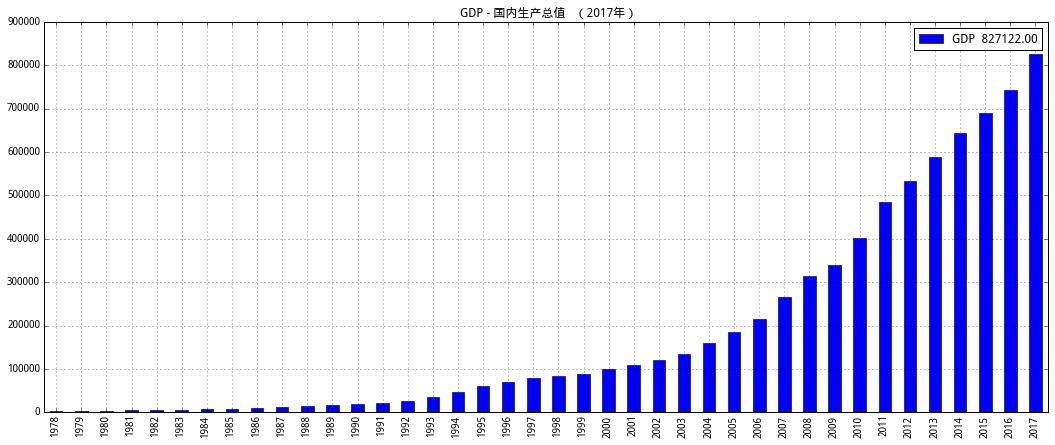

In [2]:
#GDP同比增长与指数对比图        
def get_gdp_chart(code='GDP',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_gdp_quarter(code)
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m')
    #指标最新数据
    cpi=indicator_df['gdp_yoy'].iloc[-1] 
    #组织图表指标数据
    chart_df['%s  %.2f'%(code,float(cpi))]=indicator_df['gdp_yoy']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data(period='Q')
    chart_df[contrast_title]=contrast_df   
    #去除多余数据
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s %s - %s （%s）'%(title,code,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r'])  
    
#GDP
def get_gdp_chart2(code='GDP',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_gdp_year(code)[['gdp']]
    indicator_df=indicator_df[indicator_df.index>='1978']
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y年')
    #组织图表指标数据
    chart_df['GDP  %.2f'%(indicator_df['gdp'].iloc[-1])]=indicator_df['gdp']
    #整理数据 
    chart_df=chart_df.dropna()
    chart_df=chart_df.astype('float32') 
    #图表标题,
    chart_title='%s - %s  %s （%s）'%(code,indicator_dict[code],title,lastdate)
    chart_df.plot(kind='bar',figsize=(18,7),title=chart_title,stacked=True,grid=True,
        linewidth=0.6,mark_right=False,style=['b','c','r'])  
    
get_gdp_chart()
get_gdp_chart2()

### 1.2.货币供应量-M1与M2

M0=流通中现金； 狭义货币（M1）=M0＋可开支票进行支付的单位活期存款；  广义货币（M2）=M1＋居民储蓄存款＋单位定期存款＋单位其他存款＋证券公司客户保证金；
其中，M2减M1是准货币（Quasi-money）。

 - M1增加，投资者信心增强，经济活跃度提高，股市和房地产市场上涨；反之，M1减少，股市和房地产市场下跌，因此，对股市和房地产市场具有经济晴雨表功能，并对货币变化具有放大效应。
 - 如果M1增速大于M2，意味着企业的活期存款增速大于定期存款增速，企业和居民交易活跃，微观主体盈利能力较强，经济景气度上升。
 - 如果M1增速小于M2，表明企业和居民选择将资金以定期的形式存在银行，微观个体盈利能力下降，未来可选择的投资机会有限，多余的资金开始从实体经济中沉淀下来，经济运行回落。
 - M1与上证综指的相互影响关系中上证综指的变动作为原因引起M1的变动是占主导地位的，而M1的变动引起上证综指的变动则是次要的。

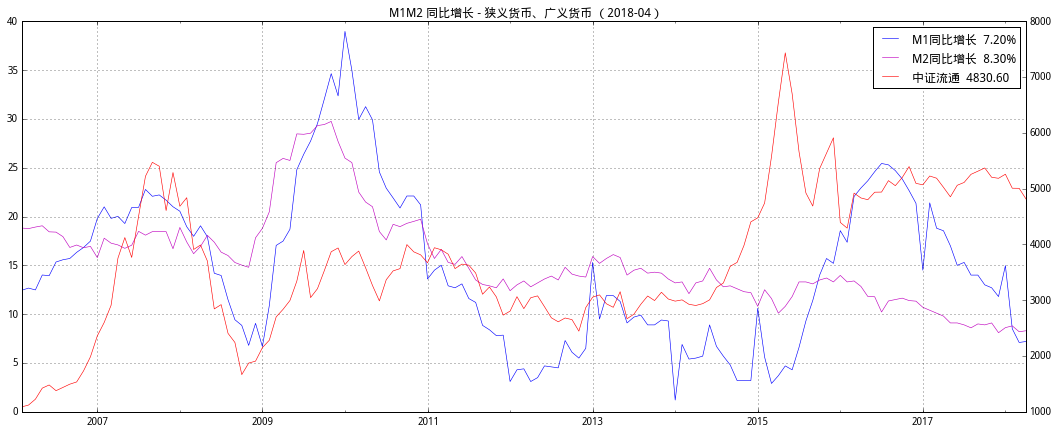

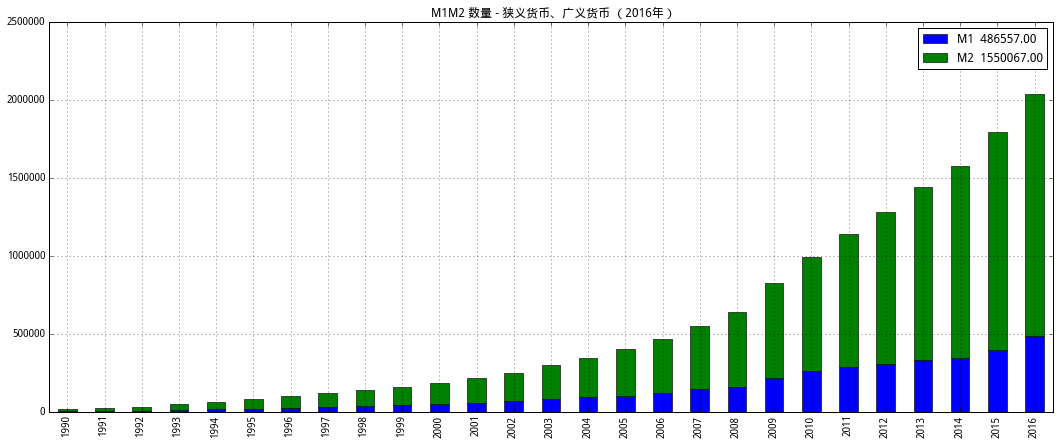

In [3]:
#M0M1同比增长与指数对比图        
def get_m1m2_chart(code='M1M2',title='同比增长'):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_m1m2_month(code)[['m1_yoy','m2_yoy']]  
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m')
    #组织图表指标数据
    chart_df['M1同比增长  %.2f%%'%(indicator_df['m1_yoy'].iloc[-1])]=indicator_df['m1_yoy']
    chart_df['M2同比增长  %.2f%%'%(indicator_df['m2_yoy'].iloc[-1] )]=indicator_df['m2_yoy']
    
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data()
    chart_df[contrast_title]=contrast_df   
    #整理数据 
    chart_df=chart_df.dropna() 
    #图表标题,
    chart_title='%s %s - %s （%s）'%(code,title,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
        linewidth=0.6,mark_right=False,grid=True,style=['b','m','r'])  

#M0M1  
def get_m1m2_chart2(code='M1M2',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_m1m2_year(code)
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y年')
    #组织图表指标数据
    chart_df['M1  %.2f'%(indicator_df['m1'].iloc[-1])]=indicator_df['m1']
    chart_df['M2  %.2f'%(indicator_df['m2'].iloc[-1])]=indicator_df['m2'] 
    #整理数据 
    chart_df=chart_df.dropna()
    chart_df=chart_df.astype('float32') 
    #图表标题,
    chart_title='%s %s - %s （%s）'%(code,title,indicator_dict[code],lastdate)
    chart_df.plot(kind='bar',figsize=(18,7),title=chart_title,stacked=True,grid=True,
        linewidth=0.6,mark_right=False,style=['b','c','r'])  
    
get_m1m2_chart(title='同比增长')
get_m1m2_chart2(title='数量')

### 1.3.消费者物价指数-CPI

CPI是消费者物价指数(Consumer Price Index)的简称，是选取一篮子消费品和劳务，以他们在消费者支出中的比重为权数来衡量的市场价格变动率，主要反映消费者支付商品和劳务的价格变化情况，与生产者物价指数PPI一样，是观察通货膨胀水平的重要指标。

 - 反映通货膨胀水平：通货膨胀的严重程度是用通货膨胀率来反映的，它说明了一定时期内商品价格持续上升的幅度。通货膨胀率一般以消费者物价指数来表示。
 - 反映货币购买力变动：货币购买力是指单位货币能够购买到的消费品和服务的数量。消费者物价指数上涨，货币购买力则下降；反之则上升。消费者物价指数的倒数就是货币购买力指数。
 - 反映对职工实际工资的影响：消费者物价指数的提高意味着实际工资的减少，消费者物价指数的下降意味着实际工资的提高。因此实际工资等于名义工资除以消费者物价指数。

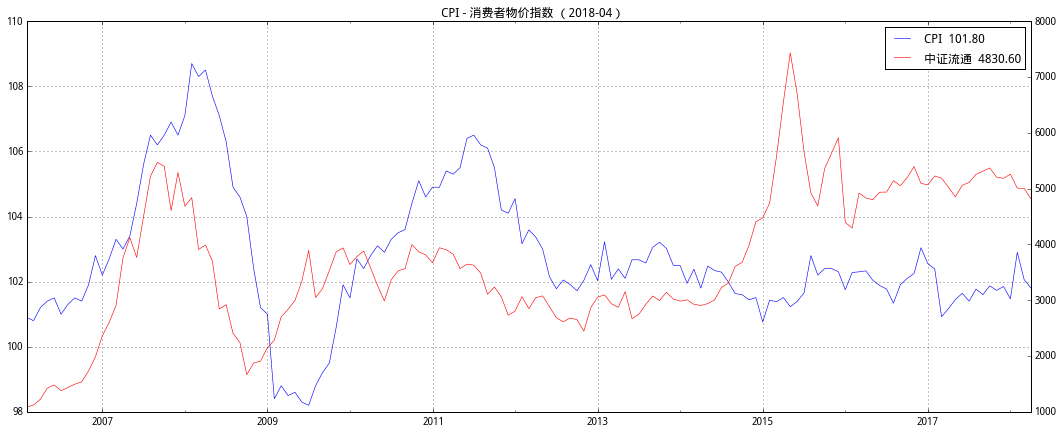

In [4]:
#生成CPI与指数对比图        
def get_cpi_chart(code='CPI',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_cpi_data(code)
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m')
    #指标最新数据
    cpi=indicator_df['cpi'].iloc[-1] 
    #组织图表指标数据
    chart_df['%s  %.2f'%(code,float(cpi))]=indicator_df['cpi']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data()
    chart_df[contrast_title]=contrast_df   
    #去除多余数据
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s %s - %s （%s）'%(title,code,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r'])  
    
get_cpi_chart()

### 1.4.工业品出厂价格指数-PPI

PPI是工业品出厂价格指数（Producer Price Index）的简称，该指数是根据制成品和原料的批发价格指数编制，反映包括原材料、中间品及最终产品在内的各种商品的批发价格的变动状况的物价指数，所以又称为生产者物价指数。与消费者物价指数CPI一样，是观察通货膨胀水平的重要指标。

 - 优点：是能灵敏地反映生产者生产成本的变化状况;
 - 缺点：是没有将各种劳务包括之内，且对一般居民的生活影响不够直接。

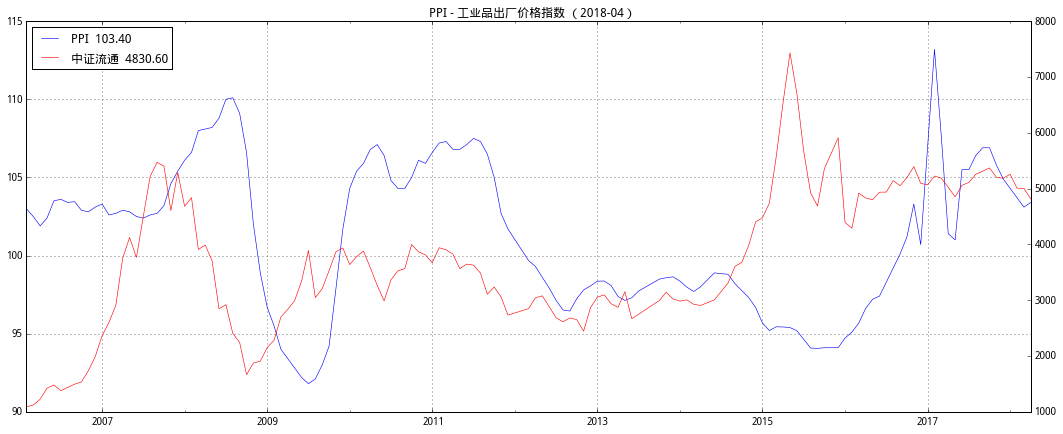

In [5]:
#生成PPI与指数对比图        
def get_ppi_chart(code='PPI',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_ppi_data(code)
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m')
    #指标最新数据
    cpi=indicator_df['ppi'].iloc[-1] 
    #组织图表指标数据
    chart_df['%s  %.2f'%(code,float(cpi))]=indicator_df['ppi']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data()
    chart_df[contrast_title]=contrast_df   
    #去除多余数据
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s %s - %s （%s）'%(title,code,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r']) 
    
get_ppi_chart()

### 1.5.采购经理指数-PMI
PMI是采购经理指数(Purchasing Managers’Index)的简称。中国制造业采购经理指数体系共包括11个指数：新订单、生产、就业、供应商配送、存货、新出口订单、采购、产成品库存、购进价格、进口、积压订单。

 - PMI指数是经济监测的先行指标。
 - 综合指数反映了经济总体情况和总的变化趋势，而各项指标又反映了企业供应与采购活动的各个侧面。

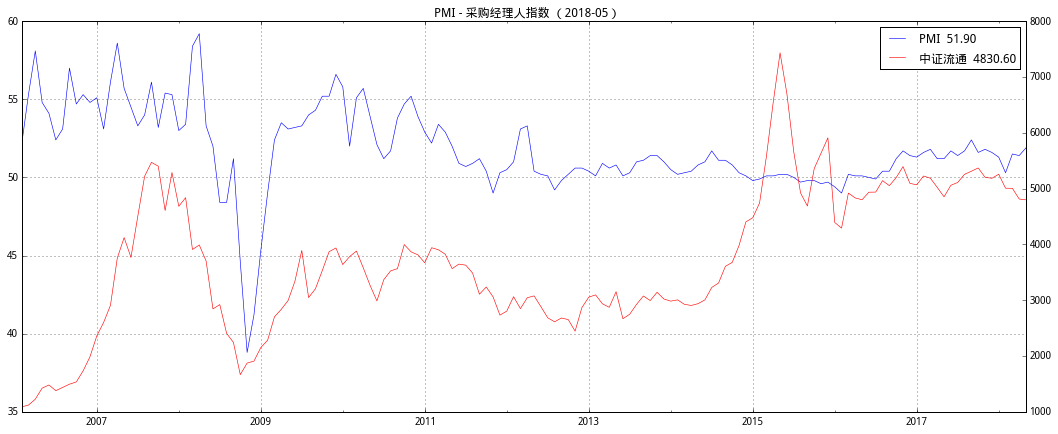

In [6]:
#生成PPI与指数对比图        
def get_pmi_chart(code='PMI',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_pmi_data(code)
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m')
    #组织图表指标数据
    chart_df['%s  %.2f'%(code,indicator_df['pmi'].iloc[-1])]=indicator_df['pmi']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data()
    chart_df[contrast_title]=contrast_df   
    #去除多余数据
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s %s - %s （%s）'%(title,code,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r']) 
    
get_pmi_chart()

### 1.6.经济金融化-M2与GDP之比
--------

 - 通常认为，这一指标比例反映了一个经济的金融深度。但M2/GDP比例的大小、趋势和原因则受到多种不同因素的影响。M2/GDP实际衡量的是在全部经济交易中，以货币为媒介进行交易所占的比重。
 - 总体上看，它是衡量一国经济金融化的初级指标。通常来说，该比值越大，说明经济货币化的程度越高。

In [7]:
#GDP同比增长与指数对比图        
def get_jrh_chart(code='',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    indicator_df=pd.DataFrame()
    #读取指标数据
    indicator_df1=get_period_data(get_m1m2_month(),period='Q')[['m2']]
#     indicator_df['m2']=get_m1m2_month()['m2']
    
#     indicator_df['gdp']=get_gdp_quarter()['gdp']
    print (indicator_df1)
    
    indicator_df['jrh']=indicator_df1['m2']/indicator_df2['gdp']*100
    indicator_df=indicator_df.dropna()
    
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y')
    #指标最新数据
    bft=indicator_df['bft'].iloc[-1] 
    #组织图表指标数据
    chart_df['%s  %.2f'%(title,float(bft))]=indicator_df['jrh']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data(period='Q')
    chart_df[contrast_title]=contrast_df    
    #去除多余数据
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s （%s）'%(title,lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r'])  
    
df=get_jrh_chart(title='经济金融化')  
df

                 m2
1991-12    19349.90
1992-12    25402.20
1993-12    34879.80
1994-12    46923.50
1995-12    60750.50
1996-12    76094.90
1997-03    79889.00
1997-06    82789.00
1997-09    85892.00
1997-12    90995.30
1998-03    92015.00
1998-06    94658.00
1998-09    99795.00
1998-12   104498.50
1999-03   108438.00
1999-06   111363.00
1999-09   115079.00
1999-12   119897.90
2000-03   122606.82
2000-06   126605.33
2000-09   130473.84
2000-12   134610.26
2001-03   138744.46
2001-06   147809.67
2001-09   151822.60
2001-12   158301.92
2002-03   164064.57
2002-06   169601.24
2002-09   176985.21
2002-12   185006.97
...             ...
2011-03   758130.98
2011-06   780820.97
2011-09   787406.24
2011-12   851590.94
2012-03   895565.50
2012-06   924991.20
2012-09   943688.75
2012-12   974148.80
2013-03  1035858.37
2013-06  1054403.69
2013-09  1077379.16
2013-12  1106524.98
2014-03  1160687.38
2014-06  1209587.20
2014-09  1202051.41
2014-12  1228374.81
2015-03  1275332.78
2015-06  1333375.36


NameError: name 'indicator_df2' is not defined

### 1.7.上海银行间同业拆放利率-SHIBOR
------------

上海银行间同业拆放利率（Shanghai Interbank Offered Rate，简称Shibor），以位于上海的全国银行间同业拆借中心为技术平台计算、发布并命名，是由信用等级较高的银行组成报价团自主报出的人民币同业拆出利率计算确定的算术平均利率，是单利、无担保、批发性利率。

 - Shibor是新的市场基准利率，Shibor对宏观管理、对于市场参与者了解市场流动性大小，都会提供很重要的指标，Shibor在金融市场的地位，为中国流动性大小提供一个很好的晴雨表和指标，因为最能衡量一个市场流动性的就是基准利率水平；同时，监管当局也可以根据利率变化制定政策，今后很多其他利率尤其是短期利率都会跟Shibor挂钩。
 - Shibor作为最基本、最市场化的资金价格，对整个宏观基准面、股市、发展金融衍生品、债券价格都具有很重要的意义。金融衍生品的定价与基准利率和风险有关。因此这个利率的变化会直接影响到金融衍生品的价格。比如Shibor利率上升，金融衍生品价格就会下降，关注Shibor的变化，它的变化会影响几乎所有资产的价格，以及其它利率如贷款利率的水平。

In [ ]:
def get_shibor_chart(code='SHIBOR',items={'ON':'隔夜拆借率'},title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_shibor_data(code)
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m-%d')
    #组织图表指标数据
    for item,name in items.items():
        chart_df['%s  %.2f'%(name,indicator_df[item].iloc[-1])]=indicator_df[item]
    #整理数据 
    chart_df=chart_df.dropna()
    chart_df=chart_df.astype('float32') 
    #图表标题,
    chart_title='%s - %s  %s （%s）'%(code,indicator_dict[code],title,lastdate)
    chart_df.plot(figsize=(18,7),title=chart_title,grid=True,
        linewidth=0.6,mark_right=False,style=['b','c','r'])  

get_shibor_chart(items={'ON':'隔夜拆借率'})
get_shibor_chart(items={'1W':'1周','2W':'2周','1M':'1月'})
get_shibor_chart(items={'3M':'3月','6M':'6月','1Y':'1年'})

### 1.8.十年期国债收益率

In [ ]:
#美元指数       
def get_c10y_chart(code='C10Y',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_cy_data(code)[['close']]
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m')
    #组织图表指标数据
    chart_df['%s  %.2f'%(code,indicator_df['close'].iloc[-1])]=indicator_df['close']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data(period='D')
    chart_df[contrast_title]=contrast_df 
    #去除多余数据
    chart_df=chart_df.dropna()
    chart_df=get_period_data(chart_df,period='W')
    #图表标题,
    chart_title='%s %s - %s （%s）'%(title,code,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r']) 
    
get_c10y_chart()

### 1.9.波罗的海干散货指数-BDI
---

BDI是波罗的海干散货指数（Baltic Dry Index）的简称，它是由几条主要航线的即期运费（Spot Rate）加权计算而成，为即期市场的行情的反映，因此，运费价格的高低会影响到指数的涨跌。

 - 波罗的海综合指数是散装船航运运价指标，而散装船运以运输钢材、纸浆、谷物、煤、矿砂、磷矿石、铝矾土等民生物资及工业原料为主。
 - 由于散装航运业营运状况与全球经济景气荣枯、原物料行情高低息息相关。因此波罗的海指数被认为是国际间贸易情况的领先指数及经济晴雨表。

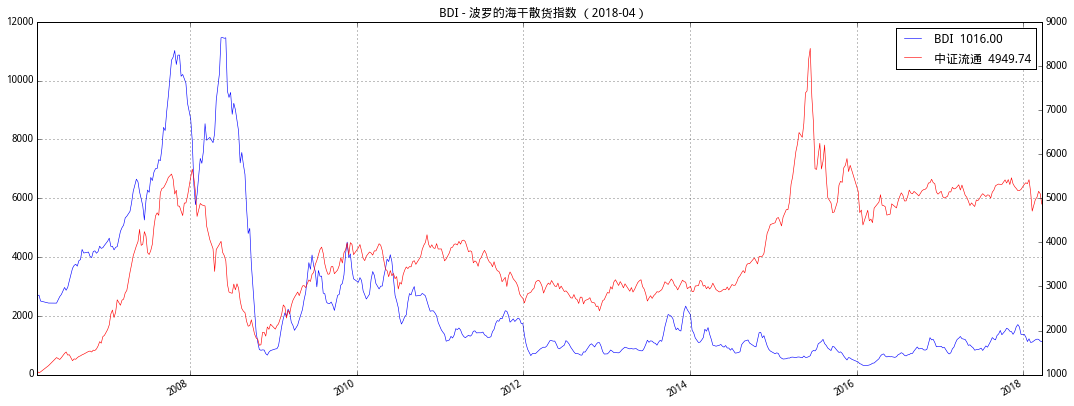

In [9]:
#生成bdI与指数对比图              
def get_bdi_chart(code='BDI',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_period_data(get_bdi_data(code),period='W')[['bdi']]
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m')
    #组织图表指标数据
    chart_df['%s  %.2f'%(code,indicator_df['bdi'].iloc[-1])]=indicator_df['bdi']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data(period='W')
    chart_df[contrast_title]=contrast_df 
    #去除多余数据
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s %s - %s （%s）'%(title,code,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r']) 
      
get_bdi_chart()

## 2.A股证券市场


### 2.1.A股市盈率、市净率、股息率

 - ROE

股本回报率（又称股权收益率、股本收益率或股东回报率或股东回报率，英语：Return On Equity，缩写：ROE），是衡量相对于股东权益的投资回报之指标，反映公司利用资产净值产生纯利的能力。计算方法是将税后净利扣除优先股股息和特殊收益后的净收益除以股东权益。此比例计算出公司普通股股东的投资回报率，是上市公司盈利能力的重要指标。
公司通常把盈利再投资以赚取更大回报，ROE正反映了公司这方面的能力，计算办法是把净收益（税后净利扣除优先股股息和特殊溢利）后，除以股东权益。
然而，公司的股权收益高不代表盈利能力强。部分行业由于不需要太多资产投入，所以通常都有较高ROE，例如咨询公司。有些行业需要投入大量基础建筑才能产生盈利，例如炼油厂。所以，不能单以ROE判定公司的盈利能力。一般而言，资本密集行业的进入门槛较高，竞争较少，相反高ROE但低资产的行业则较易进入，面对较大竞争。所以ROE应用作比较相同行业。

 - PE

股票的市盈率（Price-to-Earning Ratio，P/E或PER），又称为本益比，指每股市价除以每股盈利（Earnings Per Share，EPS），通常作为股票是便宜抑或昂贵的指标（通货膨胀会使每股收益虚增，从而扭曲市盈率的比较价值）。市盈率把企业的股价与其制造财富的能力联系起来。
每股盈利的计算方法，一般是以该企业在过去一年的净利润除以总发行已售出股数。市盈率越低，代表投资者能够以相对较低价格购入股票。
投资者计算市盈率，主要用来比较不同股票的价值。理论上，股票的市盈率愈低，表示该股票的投资风险越小，愈值得投资。比较不同行业、不同国家、不同时段的市盈率是不大可靠的。比较同类股票的市盈率较有实用价值。

 - PB

股票的股价净值比（Price-to-Book Ratio，P/B或PBR）又名市账率，指每股市价除以每股净资产，通常作为股票孰贱孰贵的指标之一。
股息率（Dividend Yield Ratio）是股息与股票价格之间的比率。在投资实践中，股息率是衡量企业是否具有投资价值的重要标尺之一。
盈利收益率其实与股息率颇为类似，仅仅是将股息率分子上的股息换成盈利，便是盈利收益率，因此，其实带出的意思亦相似，盈利收益率主要是比较盈利相对其股价的表现。

### 2.2.A股盈利收益率
-----
公式：盈利/股价，盈利收益率其实与股息率颇为类似，仅仅是将股息率分子上的股息换成盈利，便是盈利收益率，因此，其实带出的意思亦相似，盈利收益率主要是比较盈利相对其股价的表现。
巴特勒：我总是认为，我们用每股股价除以每股收益的市盈率，而不是用每股收益除以每股股价的盈利收益率作为标准真是太糟了。明白一只股票的盈利收益率是2.5%的实际意义，要比认识到同样这只股票的市盈率是40倍的实际意义要容易多了。
格雷厄姆：是的。盈利收益率的概念更加科学，也是一个更合乎逻辑的分析方法。
巴特勒：如果分红比率约为50%，那么你可以用盈利收益率的一半来大致推断未来可长期持续的红利收益率。
格雷厄姆：是的。基本上，我希望股票投资的盈利收益率能够达到利率的两倍。但是，在大多数年份，利率低于AAA评级债券所支付的5%的利率。因此，我制定了选股标准的两个上限。即使利率低于5%，市盈率最高上限倍数仍为10倍。另一个市盈率最高上限倍数是7倍，即使现在的AAA评级债券超过7%。因此，一般来说，我买入股票的时点是在股票盈利收益率将会达到AAA评级债券利率两倍的时候，最高市盈率倍数在7倍到10倍之间。

In [ ]:
get_PE_plot('A股市盈率')
get_EP_plot('A股盈利收益率')
get_EP_GZ_plot('A股盈利收益率与10年期国债收益率')

### 2.3.股票新增开户数
---------

股票开户是投资者在券商处开设的进行股票交易的账户。开立股票账户是投资者进入股市进行操作的先决条件。股票账户分为上海证券公司股票账户和深圳证券公司股票账户两种，投资者可根据需要决定办理一种或两种。

In [ ]:
#美元指数       
def get_stockcount_chart(code='STOCKCOUNT',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_stockcount_data()[['new']]
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m')
    #组织图表指标数据
    chart_df['%s  %.2f'%(title,indicator_df['new'].iloc[-1])]=indicator_df['new']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data(period='W')
    chart_df[contrast_title]=contrast_df 
    #去除多余数据
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s - %s （%s）'%(title,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r']) 

    
def get_stockcount_chart2(code='STOCKCOUNT',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_stockcount_data()[['Final']]
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y年')
    #组织图表指标数据
    chart_df['%s  %.2f'%(title,indicator_df['Final'].iloc[-1])]=indicator_df['Final']
    #整理数据 
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s - %s （%s）'%(title,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),title=chart_title,stacked=True,grid=True,
        linewidth=0.6,mark_right=False,style=['b','c','r'])   
    
    
get_stockcount_chart(title='新增账户数')
get_stockcount_chart2(title='期末账户数')

### 2.4.融资融券

融资融券又称证券信用交易，是指投资者向具有融资融券业务资格的证券公司提供担保物，借入资金买入证券（融资交易）或借入证券并卖出（融券交易）的行为。
包括券商对投资者的融资、融券和金融机构对券商的融资、融券。修订前的证券法禁止融资融券的证券信用交易。

In [ ]:
#美元人民币离岸价      
def get_rz_chart(code='MARZ',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_margins_sh()[['rzye']]
    #最后更新日期
    lastdate=indicator_df.index[-1]#.strftime('%Y-%m')
    #组织图表指标数据
    indicator_df['rzye']=indicator_df['rzye']/100000000.0
    chart_df['%s  %.2f亿'%(indicator_dict['MARZ'],indicator_df['rzye'].iloc[-1])]=indicator_df['rzye']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data(period='D')
    chart_df[contrast_title]=contrast_df 
    #去除多余数据
    chart_df=chart_df.dropna()
    chart_df=get_period_data(chart_df,period='W')
    #图表标题,
    chart_title='%s %s - %s （%s）'%(title,code,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r']) 
    
get_rz_chart()

### 2.5.证券交易结算、银证转账
-----------

 - 证券交易结算资金：是指“证券市场交易结算资金监控系统”获取的有经纪业务的证券公司全部经纪业务客户（含部分采取证券公司结算模式的资产管理计划）从事证券交易等的人民币交易结算资金，不包括投资者从事B股交易、融资融券业务等的资金，也不包括证券公司自营、QFII以及采用托管人结算模式的证券公司资产管理计划和公开募集证券投资基金等从事证券交易的资金。
 - 银证转账：是指在客户交易结算资金第三方存管制度下投资者在银行结算账户和证券资金账户之间的资金划转方式，是引起“证券交易结算资金”变动的重要方式之一。“投资者银证转账引起的资金变动金额”项下的“增加额”是指投资者从银行结算账户转入资金账户的金额；“减少额”是指投资者从资金账户转出到银行结算账户的金额；“净变动额”= “增加额”-“减少额”。

### 2.6.新增信贷
----

### 2.7.股指期货主力合约
--------

### 2.8.巴菲特指数
-----

 - “巴菲特指标”的计算基于美国股市的市值与衡量国民经济发展状况的国民生产总值(GNP)，巴菲特认为，若两者之间的比率处于70%至80%的区间之内，这时买进股票就会有不错的收益。但如果在这个比例偏高时买进股票，就等于在“玩火”。
 - 中国巴菲特指数：年末境内上市股票市价总值（A、B股）/国内生产总值（GDP）注：手上暂无中国GNP数据。

In [ ]:
#GDP同比增长与指数对比图        
def get_bft_chart(code='',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    indicator_df=pd.DataFrame()
    #读取指标数据
    indicator_df1=get_market_data()[['total_value']]
    indicator_df2=get_gdp_year()[['gdp']]
    indicator_df['bft']=indicator_df1['total_value']/indicator_df2['gdp']*100
    indicator_df=indicator_df.dropna()
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y')
    #指标最新数据
    bft=indicator_df['bft'].iloc[-1] 
    #组织图表指标数据
    chart_df['巴菲特指标  %.2f'%(float(bft))]=indicator_df['bft']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data(period='A')
    chart_df[contrast_title]=contrast_df    
    #去除多余数据
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s （%s）'%(title,lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r'])  
    
df=get_bft_chart(title='巴菲特指标')  
df

### 2.9.A股流通市值与M2之比
---------

中国市场表现通常受限于一个简单的比率——自由流通市值/M2比率(以下简称为“比率”)。当“比率”升逾15%时，市场普遍见顶回落。尽管有时比率能超越15%的水平，但市场最终回天无术(焦点图表1)。因此认为资金流动性决定着中国股市的表现。

In [ ]:
#GDP同比增长与指数对比图        
def get_15_chart(code='',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    indicator_df=pd.DataFrame()
    #读取指标数据
    indicator_df1=get_market_data()[['a_circulation_value']]
    indicator_df2=get_m1m2_year()[['m2']]
    indicator_df['bft']=indicator_df1['a_circulation_value']/indicator_df2['m2']*100
    indicator_df=indicator_df.dropna()
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y')
    #指标最新数据
    bft=indicator_df['bft'].iloc[-1] 
    #组织图表指标数据
    chart_df['%s  %.2f'%(title,float(bft))]=indicator_df['bft']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data(period='A')
    chart_df[contrast_title]=contrast_df    
    #去除多余数据
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s （%s）'%(title,lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r'])  
    
df=get_15_chart(title='自由流通市值与M2比率')  
df

### 2.10.市场人气指标
------

每月日均换手率，分母为上证A股流通市值

## 3.货币、外汇

### 3.1.美元指数

美元指数（US Dollar Index，USDX）是通过平均美元与六种国际主要外汇的汇率得出的。美元指数显示的是美元的综合值。一种衡量各种货币强弱的指标。

In [ ]:
#美元指数       
def get_usdx_chart(code='USDX',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_usdx_data(code)[['close']]
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m')
    #组织图表指标数据
    chart_df['%s  %.2f'%(code,indicator_df['close'].iloc[-1])]=indicator_df['close']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data(period='D')
    chart_df[contrast_title]=contrast_df 
    #去除多余数据
    chart_df=get_period_data(chart_df,period='W')
    chart_df=chart_df.dropna()
    #图表标题,
    chart_title='%s %s - %s （%s）'%(title,code,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','r']) 
    
get_usdx_chart()

### 3.2.美元人民币离岸价

In [ ]:
#美元人民币离岸价      
def get_uch_chart(code='UCH',title=''):
    #图表DataFrame
    chart_df=pd.DataFrame()
    #读取指标数据
    indicator_df=get_uch_data('UCH')[['close']]
    #最后更新日期
    lastdate=indicator_df.index[-1].strftime('%Y-%m')
    #组织图表指标数据
    chart_df['%s  %.2f'%(indicator_dict['UCH'],indicator_df['close'].iloc[-1])]=indicator_df['close']
    #读取指标数据
    indicator_df=get_ucy_data('UCY')[['close']]
    #组织图表指标数据
    chart_df['%s  %.2f'%(indicator_dict['UCY'],indicator_df['close'].iloc[-1])]=indicator_df['close']
    #组织指数数据
    contrast_df,contrast_title=get_contrast_data(period='D')
    chart_df[contrast_title]=contrast_df 
    #去除多余数据
    chart_df=chart_df.dropna()
    chart_df=get_period_data(chart_df,period='W')
    #图表标题,
    chart_title='%s %s - %s （%s）'%(title,code,indicator_dict[code],lastdate)
    chart_df.plot(figsize=(18,7),secondary_y=[contrast_title],title=chart_title,
                 linewidth=0.6,mark_right=False,grid=True,style=['b','g','r']) 
    
get_uch_chart()